### **Задание 1**

1. Если речь о гипотезах относительно распределения случайной величины, то в простых гипотезах тестируется предположение о том, что наблюдения пришли из определённого распределения с определёнными параметрами (например, из нормального распределения с определённым средним значением и дисперсией), в сложных - предположение о том, что наблюдения пришли из некоторого семейства распределений, без предположения о его параметрах.

2. Параметрические критерии строятся на предположении о том, что имеющиеся данные, по которым будет тестироваться гипотеза, пришли из определённого семейства распределений (как правило, из непрерывного семейства распределений, например, нормального), непараметрические критерии не имеют подобных ограничений на данные (ни на непрерывность шкалы измерений, ни на семейство распределений). При использовании непараметрических критериев, как правило, от "чистых" данных переходят к некоторым их преобразованиям (например, рангам, знакам и т.п.). 

   Соответственно, при выполнении предпосылок параметрического критерия, лучше использовать его (по сравнению с непараметрическим он будет обладать большей мощностью), в противном случае - зависит от "природы данных" и количества наблюдений. Например, если данные представляют собой результаты наблюдений за дискретной или порядковой величиной с относительно небольшим количеством возможных значений или если размер выборки небольшой, лучше использовать непараметрические критерии. Начиная с некоторого размера выборки, даже при невыполнении предпосылки об определённом виде распределения непрерывной случайной величины, параметрические критерии уже могут работать вполне неплохо (особенно учитывая их большую мощность). Также для порядковых переменных при большом количестве возможных значений и достаточном объёме выборки можно применять параметрические критерии.

3. Уровень значимости ($\alpha$) - это пороговое значение ошибки первого рода (ошибочного отвержения нулевой гипотезы), которое фиксируется до начала эксперимента и с которым затем будет сравниваться фактический уровень значимости с целью вынесения вердикта относительно отвержения или неотвержения нулевой гипотезы по результатам эксперимента.

    Фактический уровень значимости (p-value) - это вероятность получить такое же или более экстремальное значение тестовой статистики по сравнению с полученным по имеющимся данным, при условии справедливости нулевой гипотезы.

4. Проверить нормальность выборки можно с помощью следующих критериев:

- критерий Колмогорова,
- критерий Шапиро-Уилка и QQ-график
- критерий Харке-Бера

Можно и критерий критерий $\chi^2$ использовать, но для его применения нужно разбить данные на интервалы равной длины и результат теста будет зависеть от количества интервалов этого разбиения - соответственно, результат может быть неустойчивым + для непрерывных случайных величин такая "дискретизация" может быть сопряжена с потерей информации.

5. Ранг наблюдения - это его порядковый номер в вариационном ряде (упорядоченной по неубыванию последовательности наблюдений). Одинаковым по значениям наблюдениям присваивается среднее значение из их порядковых номеров. 

    Ранговые критерии являются непараметрическими. Соответственно, их можно использовать для непрерывных и порядковых случайных величин. Например, тест Манна-Уитни используется для тестирования гиотезы о том, пришли ли данные для двух несвязных выборок из одного распределения; является своеобразной непараметрической альтернативой для двухвыорочного t-теста Стьюдента. Тест знаковых рангов Вилкоксона - гипотезу об отсутствии системного сдвига в разнице между наблюдениями для двух связных выборок; непараметрическая альтернатива парному двухвыборочному t-тесту Стьюдента. Ранговые критерии предпочтительнее использовать для дискретных/ порядковых случайных величин и/или для непрерывных при небольшом количестве наблюдений. В общем-то, здесь те же аргументы, что и в п.2 для непараметрических критериев в целом.

### **Задание 2**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.gofplots import qqplot 
%matplotlib inline

In [2]:
data = pd.read_excel('employees.xls')
data.shape

(100, 10)

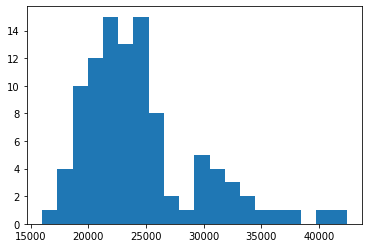

In [3]:
plt.hist(data['SALARY'], bins=20)
plt.show();

Визуально распределение не похоже на нормальное. Проверим это.

1. Критерий Колмогорова:

In [4]:
stats.kstest(data['SALARY'], cdf='norm')

KstestResult(statistic=1.0, pvalue=0.0)

На 5%-ном уровне значимости критерий Колмогорова отвергает гипотезу о нормальности распределения данных (p-value < 0.001).

2. QQ-plot:

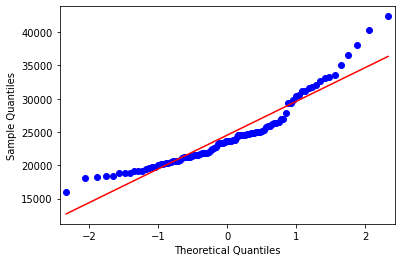

In [5]:
qqplot(data['SALARY'], line='s')
plt.show();

Квантили эмпирической функции распределения сильно отклоняются от теоретических квантилей для нормального распределения - не только по краям, но и в центре.

3. Критерий Шапиро-Уилка:

In [6]:
stats.shapiro(data['SALARY'])

ShapiroResult(statistic=0.9015016555786133, pvalue=1.6645467439957429e-06)

На 5%-ном уровне значимости критерий Шапиро-Уилка отвергает гипотезу о нормальности распределения данных (p-value < 0.001).

4. Критерий Харке-Бера:

In [7]:
stats.jarque_bera(data['SALARY'])

Jarque_beraResult(statistic=34.06327990738705, pvalue=4.011000820369759e-08)

На 5%-ном уровне значимости критерий Харке-Бера отвергает гипотезу о нормальности распределения данных (p-value < 0.001).

### **Задание 3**

In [8]:
data = pd.read_csv('sample.csv')
data.shape

(100, 1)

In [9]:
data.columns

Index(['Sample'], dtype='object')

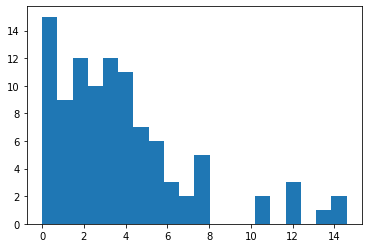

In [10]:
plt.hist(data['Sample'], bins=20)
plt.show();

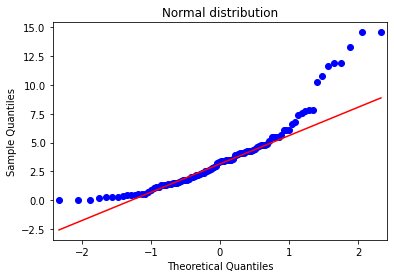

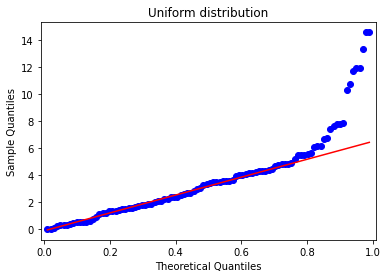

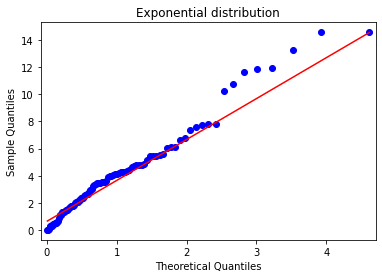

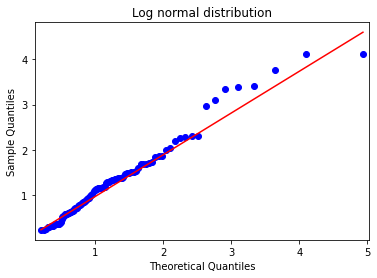

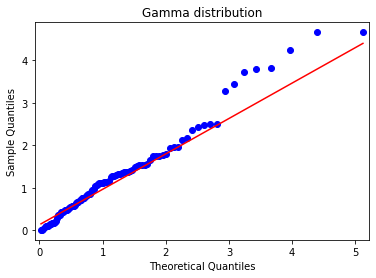

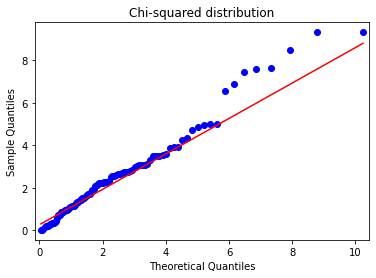

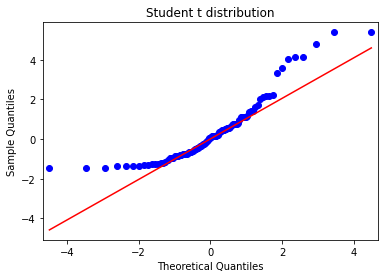

In [11]:
qqplot(data['Sample'], line='q')
plt.title('Normal distribution')

qqplot(data['Sample'], stats.uniform, line='q')
plt.title('Uniform distribution')

qqplot(data['Sample'], stats.expon, line='q')
plt.title('Exponential distribution')

qqplot(data['Sample'], stats.lognorm, line='q', fit=True)
plt.title('Log normal distribution')

qqplot(data['Sample'], stats.gamma, line='q', fit=True)
plt.title('Gamma distribution')

qqplot(data['Sample'], stats.chi2, line='q', fit=True)
plt.title('Chi-squared distribution')

qqplot(data['Sample'], stats.t, line='q', fit=True)
plt.title('Student t distribution')

plt.show();

Визуально распределение данных близко к экпоненциальному или лог-нормальному. Для проверки на логнормальность можно проверить на нормальность логарифмированные исходные данные.

In [12]:
data['Sample'].describe()

count    100.000000
mean       3.825389
std        3.255657
min        0.003851
25%        1.498980
50%        3.342138
75%        4.814318
max       14.578639
Name: Sample, dtype: float64

Видим, что все данные положительные - можно логарифмировать без потерь и дополнительных преобразований.

In [13]:
data['LogSample'] = np.log(data['Sample'])

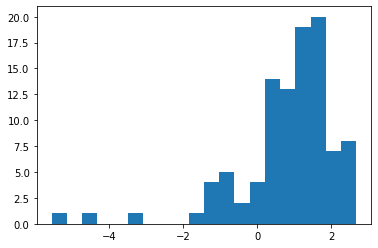

In [14]:
plt.hist(data['LogSample'], bins=20)
plt.show()

In [15]:
stats.kstest(data['LogSample'], cdf='norm')

KstestResult(statistic=0.42786074609173613, pvalue=3.883750727607277e-17)

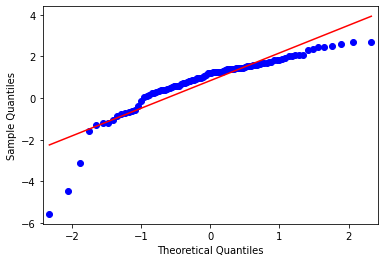

In [16]:
qqplot(data['LogSample'], line='s')
plt.show();

In [17]:
stats.shapiro(data['LogSample'])

ShapiroResult(statistic=0.8309879302978516, pvalue=2.50015586011898e-09)

Видим, что все критерии отклоняют гипотезу о нормальности распределения логарифма исходных данных.

Что касается проверки данных на соответствие экспоненциальному распределению, то здесь можно использовать критерий Колмогорова, причем поскольку мы оцениваем параметры этого распределения по выборочным данным, корректнее использовать модификацию теста Колмогорова, а именно: тест Лиллиефорса (см., например, [здесь](https://stats.stackexchange.com/questions/110272/a-naive-question-about-the-kolmogorov-smirnov-test)).

Есть ещё метод исключения параметра и критерий Джини (о них рассказывали на лекции), которые позволяют проверить распределение на экспоненциальность, но я ограничусь тестом Лиллиефорса, поскольку он есть в Питоне.

In [18]:
from statsmodels.stats.diagnostic import lilliefors
lilliefors(data['Sample'], 'exp')

(0.09818555356502978, 0.0971852995226605)

Второе из возвращенных значений - это p-value - на 5%-ном уровне значимости мы не отвергаем гипотезу об экспоненциальном распределении данных. Таким образом, наиболее подходящим для исходных данных является экспоненциальное распределение.

### **Задание 4**

In [19]:
data = pd.read_csv('anorexia.txt', delimiter = "\t")
data.columns

Index(['Before', 'After'], dtype='object')

In [20]:
data.describe()

,Before,After
count,29.000000,29.000000
mean,82.689655,85.696552
std,4.845495,8.351924
min,70.000000,71.300000
25%,80.400000,81.900000
50%,82.600000,83.900000
75%,85.000000,90.900000
max,94.900000,103.600000


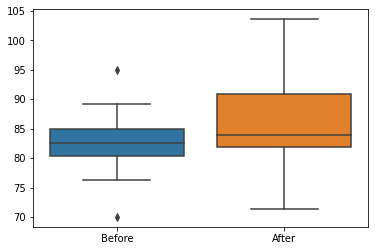

In [21]:
import seaborn as sns
sns.boxplot(data=data)
plt.show();

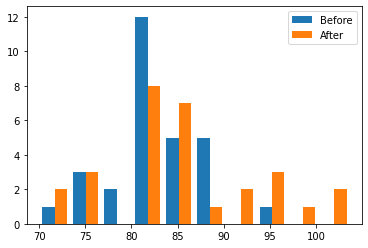

In [22]:
plt.hist(data)
plt.legend(data.columns)
plt.show();

Выборки показателя до и после терапии являются связными. Неизвестно, что это за показатель, поэтому нельзя сказать, ожидалось ли его увеличение или уменьшение в результате терапии, поэтому альтернативные гипотезы во всех критериях ниже будут двусторонними. Для проверки того, была ли терапия эффективной, подойдут следующие критерии:

**1) t-критерий Стьюдента для связных выборок**:
- $H_0$: среднее значение показателя до терапии равно среднему значению показателя после неё
- $H_a$: средние значения не равны
- предпосылки: предполагается, что распределение разницы между парными выборками имеет нормальное распределение

Для начала проверим, выполняется ли предпосылка о нормальности распределения разницы.

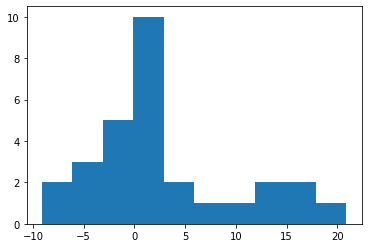

In [23]:
plt.hist(data['After']-data['Before'])
plt.show();

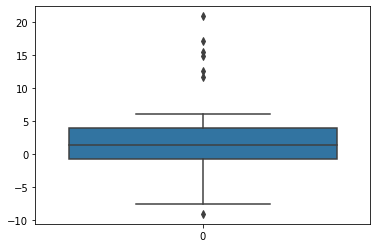

In [24]:
sns.boxplot(data=data['After']-data['Before'])
plt.show();

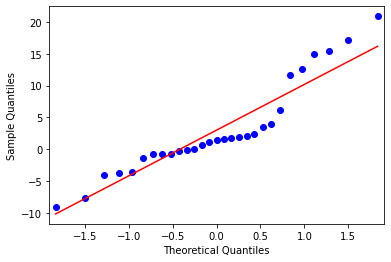

In [25]:
qqplot(data['After']-data['Before'], line='s')
plt.show();

In [26]:
stats.shapiro(data['After']-data['Before'])

ShapiroResult(statistic=0.8961783647537231, pvalue=0.007945157587528229)

На 5%-ном уровне значимости гипотеза о нормальности распределения отвергается, и по QQ-графику видны отклонения от нормального распределения, особенно в правой части распределения. Поэтому формально t-тест Стьюдента применять нельзя, тем более, как видно по боксплоту, у разницы показателей до и после терапии есть выбросы.

**2) критерий знаков (непараметрический)**:
- $H_0$: разница между медианами показателя до и после терапии равна нулю (иными словами, медианы равны)
- $H_a$: разница между медианами не равна 0

In [27]:
from statsmodels.stats.descriptivestats import sign_test
sign_test(data['After']-data['Before'])

(3.5, 0.26493089646101)

На 5%-ном уровне значимости мы не можем отвергнуть нулевую гипотезу - соответственно, не можем говорить о том, что терапия была эффективной.

**3) критерий знаковых рангов Вилкоксона (непараметрический)**:
- $H_0$: системный сдвиг в разнице между показателями до и после терапии равен нулю
- $H_a$: системный сдвиг не равен нулю
- предпосылки: предполагается, что распределение разницы между связными выборками является симметричным

По гистограмме выше видно, что распределение не является симметричным, поэтому я бы не стала применять критерий Вилкоксона - вполне достаточно критерия знаков, у которого нет подобных ограничений.

### **Задание 5**

In [28]:
data = pd.read_csv('seattle.txt', delimiter = "\t")
data.columns

Index(['Price', 'Year'], dtype='object')

In [29]:
data.groupby('Year').describe()

Price                                                                
     count       mean         std   min     25%      50%       75%     max
Year                                                                      
2001  50.0  288.92654  157.777757  50.0  190.25  260.800  406.7375   710.0
2002  50.0  329.25714  316.830045  50.0  176.20  244.925  328.6250  1850.0

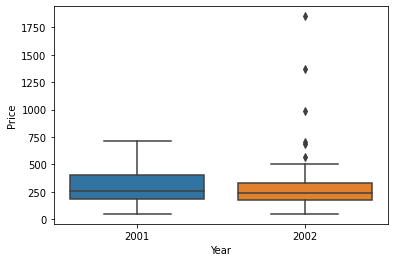

In [30]:
sns.boxplot(x='Year', y='Price', data=data)
plt.show();

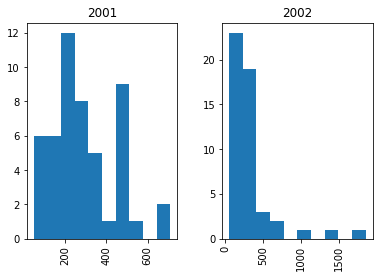

In [31]:
data['Price'].hist(by=data['Year'])
plt.show();

Выборки показателя до и после терапии являются независимыми. Для проверки того, изменились ли, в среднем, цены на недвижимость за 1 год, подойдут следующие критерии:

**1) двухвыборочный t-критерий Стьюдента**:
- $H_0$: средняя цена в 2001 году равна средней цене в 2002 году
- $H_a$: средние цены не равны
- предпосылки: предполагается, что распределение показателей в обеих выборках является нормальным, не содержит выбросов, а также то, что обе выборки содержат равное количество наблюдений или дисперсия больше в большей по размеру выборке

По гистограммам видно, что распределения не являются нормальными, но при имеющемся объёме выборки мы могли бы пренебречь этим условием, однако по боксплоту видно также, что выборка 2002 года содержит несколько выбросов, а описательная статистика позволяет предположить, что дисперсии выборок сильно отличаются, поэтому вместо классического t-теста я бы использовала t-тест Уэлча.

In [32]:
stats.ttest_ind(data[data['Year']==2001].Price, data[data['Year']==2002].Price, equal_var=False)

Ttest_indResult(statistic=-0.8057258725189664, pvalue=0.42305786816462276)

На 5%-ном уровне значимости мы не можем отвергнуть нулевую гипотезу, а значит, не можем говорить об изменении средней цены на недвижимость.

**2) критерий Манна-Уитни**:
- $H_0$: функции распределения обеих выборок равны
- $H_a$: доминирование одной функции распределения над другой

In [33]:
stats.mannwhitneyu(data[data['Year']==2001].Price, data[data['Year']==2002].Price, alternative='two-sided')

MannwhitneyuResult(statistic=1295.5, pvalue=0.7563872675701748)

На 5%-ном уровне значимости мы не можем отвергнуть гипотезу о равенстве функций распределения, а значит, не можем говорить о доминировании одной функции над другой. Конечно, строго говоря, критерий Манна-Уитни не позволяет ответить на вопрос об изменении средней цены, но при нарушении предпосылок для t-теста Стьюдента часто используется как его непараметрическая альтернатива.

**3) критерий Колмогорова-Смирнова**:
- $H_0$: функции распределения обеих выборок равны
- $H_a$: функции распределения не равны

In [34]:
stats.ks_2samp(data[data['Year']==2001].Price, data[data['Year']==2002].Price)

KstestResult(statistic=0.14, pvalue=0.7166468440414822)

На 5%-ном уровне значимости мы не можем отвергнуть гипотезу о равенстве функций распределения. Конечно, строго говоря, критерий Колмогорова-Смирнова не позволяет ответить на вопрос об изменении средней цены, но тем не менее, он является одним из критериев однородности для двух независимых выборок.

В целом, по результатам анализа я бы сказала, что, в среднем, цена на недвижимость в 2002 году по сравнению с 2001 г. не изменилась значимым образом.

### **Задание 6**

In [35]:
data = pd.read_csv('methylphenidate.txt', delimiter = " ")
data.columns

Index(['Placebo', 'Methylphenidate'], dtype='object')

In [36]:
data.describe()

,Placebo,Methylphenidate
count,24.000000,24.000000
mean,39.750000,44.708333
std,11.314669,12.319935
min,26.000000,29.000000
25%,33.000000,35.000000
50%,36.000000,42.500000
75%,44.500000,52.500000
max,71.000000,77.000000


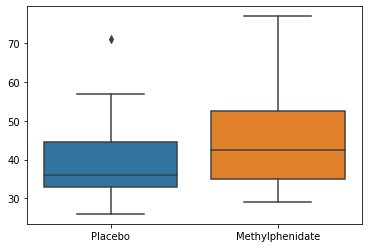

In [37]:
sns.boxplot(data=data)
plt.show();

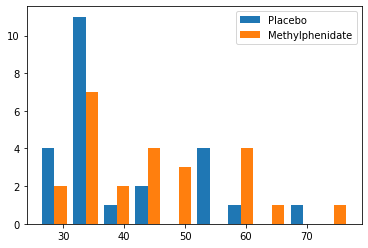

In [38]:
plt.hist(data)
plt.legend(data.columns)
plt.show();

Выборки результатов терапии с плацебо и метилфенидатом являются связными. Для проверки того, была ли эффект от применения метилфенидата, подойдут следующие критерии:

**1) t-критерий Стьюдента для связных выборок**:
- $H_0$: среднее значение показателя для способности подавления нежелательных реакций в случае приёма метилфенидата и плацебо равны
- $H_a$: средние значения не равны
- предпосылки: предполагается, что распределение разницы между парными выборками имеет нормальное распределение

Для начала проверим, выполняется ли предпосылка о нормальности распределения разницы.

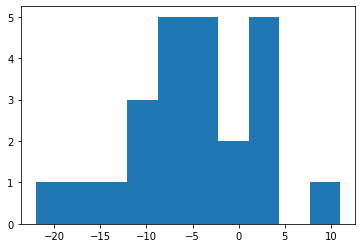

In [39]:
plt.hist(data['Placebo']-data['Methylphenidate'])
plt.show();

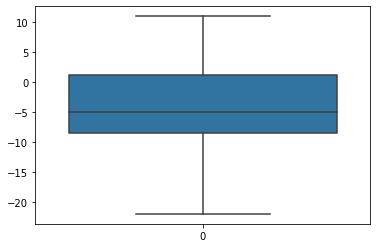

In [40]:
sns.boxplot(data=data['Placebo']-data['Methylphenidate'])
plt.show();

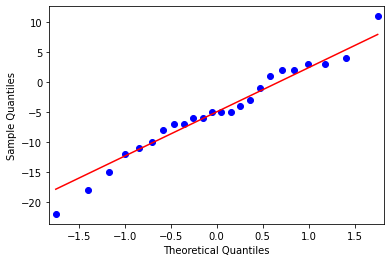

In [41]:
qqplot(data['Placebo']-data['Methylphenidate'], line='s')
plt.show();

In [42]:
stats.shapiro(data['Placebo']-data['Methylphenidate'])

ShapiroResult(statistic=0.9798052906990051, pvalue=0.8922504186630249)

На 5%-ном уровне значимости мы не можем отвергнуть гипотезу о нормальности распределения, и по QQ-графику отклонения от нормального распределения минимальны. Поэтому формально мы можем использовать t-тест Стьюдента.

In [43]:
stats.ttest_rel(data['Placebo'], data['Methylphenidate'])

Ttest_relResult(statistic=-3.2223624451230406, pvalue=0.003771488176381471)

На 5%-ном уровне значимости мы можем отвергнуть гипотезу о различиях в средней способности сдерживать импульсивные реакции. Поскольку мы предполагаем, что препарат должен эти способности улучшать, мы можем применить критерий с одностронней альтернативой о том, что в случае приёма метилфенидата среднее значение было выше, чем в случае приёма плацебо.

In [44]:
stats.ttest_rel(data['Placebo'], data['Methylphenidate'], alternative='less')

Ttest_relResult(statistic=-3.2223624451230406, pvalue=0.0018857440881907355)

Таким образом, на 5%-ном уровне значимости мы можем отвергнуть нулевую гипотезу в пользу альтернативы, что при использовании метилфенидата у пациентов, в среднем, повышается способность сдерживать нежелательные реакции.

**2) критерий знаков (непараметрический)**:
- $H_0$: разница между медианами способности сдерживать нежелательные реакции при использовании плацебо и метилфенидата равна нулю (иными словами, медианы равны)
- $H_a$: разница между медианами не равна 0

In [47]:
sign_test(data['Placebo']-data['Methylphenidate'])

(-5.0, 0.06391465663909912)

На 5%-ном уровне значимости мы не можем отвергнуть нулевую гипотезу в пользу альтернативы о неравенстве медиан. Однако видно, что фактический уровень значимости довольно близок к пороговому - посмотрим, получится ли отвергнуть нулевую гипотезу в пользу альтернативы о превышении медианы способности контролировать реакции при использовании метилфенидата по сравнению с плацебо. Это можно сделать с помощью одновыборочного биномиального теста для доли, который позволит протестировать гипотезу о том, что доля наблюдений, в которых результат для метилфенидата превышает результат для плацебо среди всех наблюдений, больше 0.5. Применяется именно этот тест, т.к. в случае справедливости нулевой гипотезы в критерии знаков предполагается, что тестовая статистика, равная количеству наблюдений, в которых результат для метилфенидата превышает результат для плацебо, имеет биномиальное распределение с количеством наблюдений, равным размеру выборки, и вероятности успеха 0.5.

In [50]:
stats.binom_test(np.sum(data['Methylphenidate'] > data['Placebo']), data.shape[0]), 0.5, alternative = 'greater')

0.03195732831954956

Да, на 5%-ном уровне значимости мы можем отвергнуть гипотезу о равенстве медиан в пользу превышения медианы при использовании метифендиата над медианой при приёме плацебо.

**3) критерий знаковых рангов Вилкоксона (непараметрический)**:
- $H_0$: системный сдвиг в разнице между способностью сдердивать импульсивные реакции при использовании плацебо и метифенидата равен нулю
- $H_a$: системный сдвиг не равен нулю
- предпосылки: предполагается, что распределение разницы между связными выборками является симметричным

По гистограмме выше видно, что распределение не является симметричным, поэтому я бы не стала применять критерий Вилкоксона - в данном случае вполне достаточно параметрического t-теста Стьюдента (и предпосылки его не нарушаются, и мощность у него больше).

В целом, по результатам анализа можно сделать вывод о том, что приём метилфенидата был связан с получением более высоких оценок способности сдерживать импульсивные реакции по сравнению с плацебо - иными словами, препарат был эффективен.

### **Задание 7**

In [54]:
data = pd.read_csv('mtcars.csv', index_col=False)
data.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [55]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [56]:
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


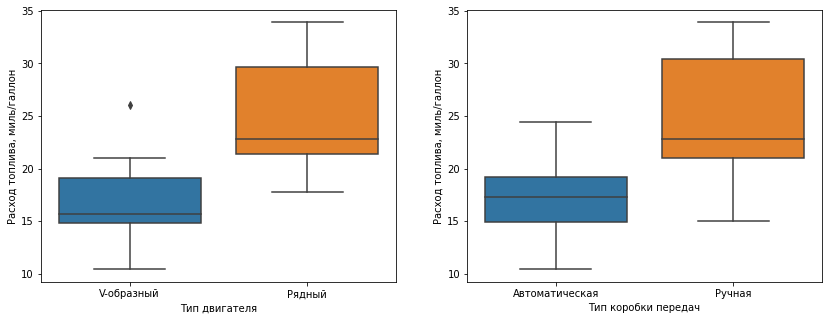

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(ax=ax[0], x='vs', y='mpg', data=data).set(xlabel='Тип двигателя',
                                            ylabel='Расход топлива, миль/галлон',
                                            xticklabels=['V-образный', 'Рядный'])

sns.boxplot(ax=ax[1], x='am', y='mpg', data=data).set(xlabel='Тип коробки передач',
                                            ylabel='Расход топлива, миль/галлон',
                                            xticklabels=['Автоматическая', 'Ручная']);

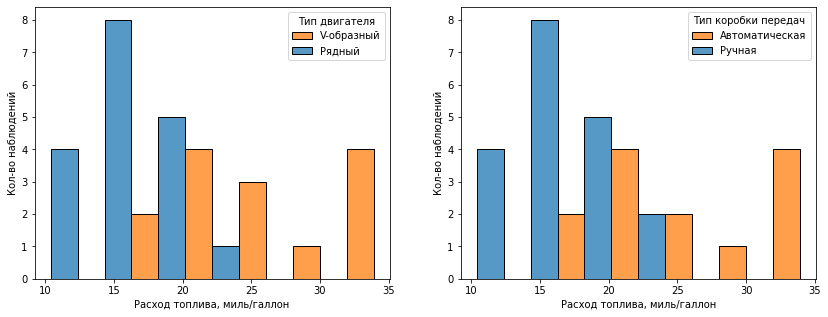

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(ax=ax[0], multiple='dodge',
             x='mpg', hue='vs', data=data).set(xlabel='Расход топлива, миль/галлон',
                                              ylabel='Кол-во наблюдений')
ax[0].legend(title='Тип двигателя', labels=['V-образный', 'Рядный'])

sns.histplot(ax=ax[1], multiple='dodge',
             x='mpg', hue='am', data=data).set(xlabel='Расход топлива, миль/галлон',
                                              ylabel='Кол-во наблюдений')
ax[1].legend(title='Тип коробки передач', labels=['Автоматическая', 'Ручная']);

In [77]:
data.groupby('vs').mpg.describe()

,count,mean,std,min,25%,50%,75%,max
vs,,,,,,,,
0,18.0,16.616667,3.860699,10.4,14.775,15.65,19.075,26.0
1,14.0,24.557143,5.378978,17.8,21.400,22.80,29.625,33.9


In [78]:
data.groupby('am').mpg.describe()

,count,mean,std,min,25%,50%,75%,max
am,,,,,,,,
0,19.0,17.147368,3.833966,10.4,14.95,17.3,19.2,24.4
1,13.0,24.392308,6.166504,15.0,21.00,22.8,30.4,33.9


Выборки значений расхода топлива в зависимости от типа двигателя и типа коробки передач являются независимыми. Для проверки того, отличается ли расход толпива в зависимости от этиъ характеристик, подойдут следующие критерии:

**1) двухвыборочный t-критерий Стьюдента**:
- $H_0$: средний расход топлива одинаков для обоих типов двигателя/ обоих типов коробки передач
- $H_a$: средний расход топлива разный
- предпосылки: предполагается, что распределение показателей в обеих выборках является нормальным, не содержит выбросов, а также то, что обе выборки содержат равное количество наблюдений или дисперсия больше в большей по размеру выборке

Ниже тесты показывают, что распределения являются нормальными, но вот предпосылка о том, что дисперсия больше в большей по размеру выборке, нарушается (это видно по таблицам с описательной статистикой, приведенным выше: стандартное отклонение в обоих случаях больше в меньшей выборке). Поэтому, строго говоря, мы не можем применять двухвыборочный t-тест в данном случае.

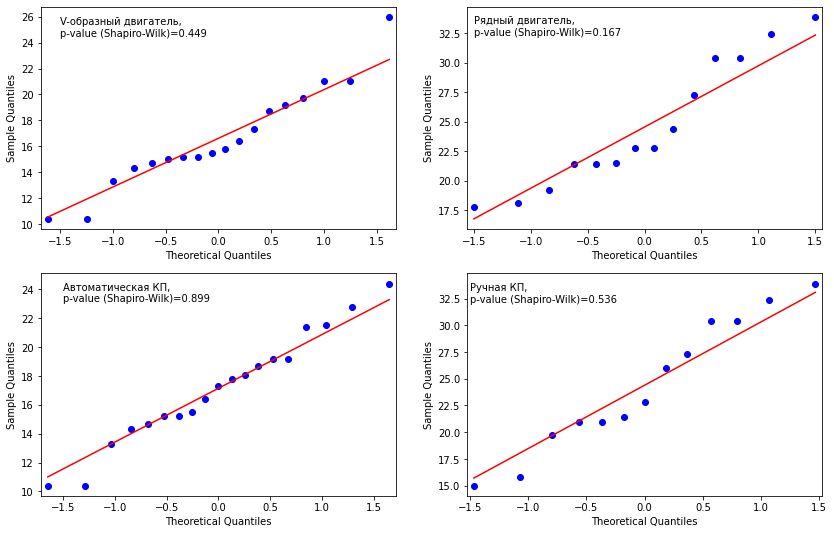

In [110]:
fig, ax = plt.subplots(2, 2, figsize=(14, 9))
qqplot(data[data['vs']==0].mpg, line='s', ax=ax[0][0])
ax[0][0].text(-1.5, 26, 'V-образный двигатель, \np-value (Shapiro-Wilk)=' + str(round(stats.shapiro(data[data['vs']==0].mpg)[1],3)), 
              verticalalignment='top', horizontalalignment='left')
qqplot(data[data['vs']==1].mpg, line='s', ax=ax[0][1])
ax[0][1].text(-1.5, 34, 'Рядный двигатель, \np-value (Shapiro-Wilk)=' + str(round(stats.shapiro(data[data['vs']==1].mpg)[1],3)), 
              verticalalignment='top', horizontalalignment='left')
qqplot(data[data['am']==0].mpg, line='s', ax=ax[1][0])
ax[1][0].text(-1.5, 24.5, 'Автоматическая КП, \np-value (Shapiro-Wilk)=' + str(round(stats.shapiro(data[data['am']==0].mpg)[1],3)), 
              verticalalignment='top', horizontalalignment='left')
qqplot(data[data['am']==1].mpg, line='s', ax=ax[1][1])
ax[1][1].text(-1.5, 34, 'Ручная КП, \np-value (Shapiro-Wilk)=' + str(round(stats.shapiro(data[data['am']==1].mpg)[1],3)), 
              verticalalignment='top', horizontalalignment='left')
plt.show();

**2) критерий Манна-Уитни**:
- $H_0$: функции распределения обеих выборок равны
- $H_a$: доминирование одной функции распределения над другой

In [111]:
stats.mannwhitneyu(data[data['vs']==0].mpg, data[data['vs']==1].mpg, alternative='two-sided')

MannwhitneyuResult(statistic=22.5, pvalue=9.034471700053182e-05)

In [112]:
stats.mannwhitneyu(data[data['am']==0].mpg, data[data['am']==1].mpg, alternative='two-sided')

MannwhitneyuResult(statistic=42.0, pvalue=0.0018713913331785542)

На 5%-ном уровне значимости мы не можем отвергнуть гипотезу о равенстве функций распределения расхода топлива для разных двигателей и для разных коробок передач, а значит, можем говорить о доминировании одной функции над другой. Если судить по боксплотам и описательной статистике, то доминирует распределение для рядного двигателя по сравнению с V-образным, а также распределение для ручной коробки передач по сравнению с автоматической. Можно проверить это с помощью теста с односторонней альтернативой.

In [115]:
stats.mannwhitneyu(data[data['vs']==0].mpg, data[data['vs']==1].mpg, alternative='less')

MannwhitneyuResult(statistic=22.5, pvalue=4.517235850026591e-05)

In [116]:
stats.mannwhitneyu(data[data['am']==0].mpg, data[data['am']==1].mpg, alternative='less')

MannwhitneyuResult(statistic=42.0, pvalue=0.0009356956665892771)

**3) критерий Колмогорова-Смирнова**:
- $H_0$: функции распределения обеих выборок равны
- $H_a$: функции распределения не равны

In [113]:
stats.ks_2samp(data[data['vs']==0].mpg, data[data['vs']==1].mpg)

KstestResult(statistic=0.7301587301587301, pvalue=0.0001328071108758211)

In [114]:
stats.ks_2samp(data[data['am']==0].mpg, data[data['am']==1].mpg)

KstestResult(statistic=0.6356275303643725, pvalue=0.00194012440784197)

На 5%-ном уровне значимости мы не можем отвергнуть гипотезу о равенстве функций распределения.

В целом, по результатам анализа я бы сказала, что да, расход топлива различается в зависимости от типа двигателя и типа коробки передач.